In [1]:
# Reinstalling Libraries
!pip uninstall ultralytics -y
!pip uninstall roboflow -y
!pip uninstall wandb -y

!pip install ultralytics
!pip install roboflow
!pip install wandb


Found existing installation: ultralytics 8.1.24
Uninstalling ultralytics-8.1.24:
  Successfully uninstalled ultralytics-8.1.24
Found existing installation: roboflow 1.1.23
Uninstalling roboflow-1.1.23:
  Successfully uninstalled roboflow-1.1.23
Found existing installation: wandb 0.16.4
Uninstalling wandb-0.16.4:
  Successfully uninstalled wandb-0.16.4
  Using cached ultralytics-8.1.24-py3-none-any.whl (719 kB)
  Using cached roboflow-1.1.23-py3-none-any.whl (71 kB)
  Using cached wandb-0.16.4-py3-none-any.whl (2.2 MB)


In [1]:
# Importing libraries
import os
from IPython.display import display, Image
from IPython import display
from ultralytics import YOLO
import wandb
import random

In [2]:
!pwd

/notebooks


In [2]:
# Checking the env and logging into wandb
display.clear_output()
!yolo checks
!wandb login --relogin "2643de84785eb3756d52778c88dbffe263c3eb00"

Ultralytics YOLOv8.1.24 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Setup complete ✅ (8 CPUs, 44.1 GB RAM, 141.8/244.2 GB disk)

OS                  Linux-5.19.0-45-generic-x86_64-with-glibc2.31
Environment         Docker
Python              3.9.16
Install             pip
RAM                 44.08 GB
CPU                 Intel Xeon Gold 5315Y 3.20GHz
CUDA                11.6

matplotlib          ✅ 3.6.1>=3.3.0
opencv-python       ✅ 4.6.0.66>=4.6.0
pillow              ✅ 9.2.0>=7.1.2
pyyaml              ✅ 5.4.1>=5.3.1
requests            ✅ 2.28.2>=2.23.0
scipy               ✅ 1.9.2>=1.4.1
torch               ✅ 1.12.1+cu116>=1.8.0
torchvision         ✅ 0.13.1+cu116>=0.9.0
tqdm                ✅ 4.64.1>=4.64.0
psutil              ✅ 5.9.4
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 1.5.0>=1.1.4
seaborn             ✅ 0.12.0>=0.11.0
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [3]:
# Start a new wandb run to track
wandb.init(
    # Set the wandb project where this run will be logged
    project="BH_task",

    # Track hyperparameters and run metadata
    config={
        "task": "detect",
        "mode": "train",
        "model": "yolov8s.pt",
        "data": "/notebooks/data/data.yaml",
        "epochs": 50,
        "imgsz": 640,
        "device": 0
    }
)

# Simulate training
epochs = 50
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # Log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [Optional] Finish the wandb run, necessary in notebooks
wandb.finish()


wandb: Currently logged in as: amananand97. Use `wandb login --relogin` to force relogin


acc,▂▁▆▆▅▇▇▆▇▇███▇█▇███████▇████████████████
loss,█▄▄▃▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
acc,0.96615
loss,0.04997


In [5]:
from roboflow import Roboflow

rf = Roboflow(api_key="SqXwZ9H1RIAYVwrE117l")
project = rf.workspace("train-yu3wc").project("cad-drawings")
version = project.version(2)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cad-drawings-2 in yolov8-obb:: 100%|██████████| 12264/12264 [00:02<00:00, 5370.43it/s]


In [5]:
# Load a model
model = YOLO("yolov8s.yaml")  # build a new model from scratch
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

# Use the model
#results = model.train(data="data/data.yaml", epochs=100, imgsz=640, conf=0.7)  # 1st model hyperparameters
results = model.train(data="dataset/data.yaml", epochs=50, imgsz=640, conf=0.5, batch=16, momentum=0.937, weight_decay=0.0005, workers=8)  # 2nd model hyperparameters
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.1.24 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train16, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.5, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /notebooks/dataset/valid/labels... 517 images, 0 backgrounds, 0 corrupt: 100%|██████████| 517/517 [00:00<00:00, 678.69it/s]

train: New cache created: /notebooks/dataset/valid/labels.cache



val: Scanning /notebooks/dataset/valid/labels.cache... 517 images, 0 backgrounds, 0 corrupt: 100%|██████████| 517/517 [00:00<?, ?it/s]


Plotting labels to runs/detect/train16/labels.jpg... 

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train16
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.33G      1.578      2.242      1.386        195        640: 100%|██████████| 33/33 [00:23<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.19it/s]

                   all        517      14431      0.672      0.659      0.681      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.21G      1.217      1.128      1.156        220        640: 100%|██████████| 33/33 [00:11<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.16it/s]

                   all        517      14431      0.775      0.544      0.658      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.66G      1.198      1.044      1.143        225        640: 100%|██████████| 33/33 [00:12<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.70it/s]


                   all        517      14431      0.757      0.638      0.694      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         5G      1.158      1.003      1.133        204        640: 100%|██████████| 33/33 [00:12<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.42it/s]


                   all        517      14431      0.769      0.728      0.759      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.73G      1.119     0.9576       1.11        186        640: 100%|██████████| 33/33 [00:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.68it/s]

                   all        517      14431      0.774      0.769      0.793       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.86G      1.107     0.9032      1.108        177        640: 100%|██████████| 33/33 [00:12<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.51it/s]

                   all        517      14431      0.781      0.795      0.824      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.42G      1.098     0.8931      1.104        386        640: 100%|██████████| 33/33 [00:09<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.44it/s]

                   all        517      14431      0.845      0.758      0.812      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.14G       1.08     0.8818      1.087        172        640: 100%|██████████| 33/33 [00:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.02it/s]

                   all        517      14431      0.879      0.648      0.775      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.96G       1.06     0.8605      1.086        126        640: 100%|██████████| 33/33 [00:12<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.15it/s]

                   all        517      14431      0.855      0.755      0.822      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.05G      1.036     0.8428      1.077        178        640: 100%|██████████| 33/33 [00:12<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.45it/s]

                   all        517      14431       0.89       0.78      0.842      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.67G      1.021     0.8224      1.062        279        640: 100%|██████████| 33/33 [00:12<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.57it/s]


                   all        517      14431      0.853      0.785      0.838      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.88G      1.057     0.8279      1.081        182        640: 100%|██████████| 33/33 [00:11<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.71it/s]

                   all        517      14431      0.899      0.754      0.838      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.13G       1.03     0.8123      1.074        304        640: 100%|██████████| 33/33 [00:11<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.44it/s]

                   all        517      14431      0.872      0.777      0.841       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.71G      1.018     0.7821      1.054        208        640: 100%|██████████| 33/33 [00:11<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.82it/s]

                   all        517      14431      0.858      0.823      0.867      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.56G     0.9714     0.7417      1.045        157        640: 100%|██████████| 33/33 [00:12<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.09it/s]

                   all        517      14431      0.909      0.768      0.849      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.91G     0.9767     0.7347      1.042        200        640: 100%|██████████| 33/33 [00:11<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.96it/s]

                   all        517      14431      0.888      0.796      0.862      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.22G     0.9588     0.7424      1.042        213        640: 100%|██████████| 33/33 [00:11<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.76it/s]

                   all        517      14431      0.931      0.762      0.855      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.46G     0.9771     0.7343      1.047        142        640: 100%|██████████| 33/33 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.42it/s]

                   all        517      14431      0.881      0.811      0.866      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.49G     0.9782      0.721      1.046        122        640: 100%|██████████| 33/33 [00:11<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.74it/s]

                   all        517      14431      0.901      0.816      0.876      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.89G      0.968     0.7244      1.049        172        640: 100%|██████████| 33/33 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.08it/s]


                   all        517      14431      0.916      0.796       0.87      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.04G     0.9445     0.6957      1.028        219        640: 100%|██████████| 33/33 [00:11<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.80it/s]


                   all        517      14431      0.927      0.785      0.866       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.29G     0.9454     0.7181      1.031        142        640: 100%|██████████| 33/33 [00:12<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  5.81it/s]

                   all        517      14431      0.911      0.815      0.881      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         5G       0.95     0.6974      1.033        204        640: 100%|██████████| 33/33 [00:11<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.34it/s]

                   all        517      14431      0.903      0.829      0.885      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.64G     0.9473     0.7051      1.034        163        640: 100%|██████████| 33/33 [00:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.32it/s]


                   all        517      14431      0.933      0.787      0.871       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         5G     0.9399     0.6852      1.036        171        640: 100%|██████████| 33/33 [00:11<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.51it/s]

                   all        517      14431      0.941      0.764      0.862      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.94G     0.9271     0.6836      1.026        233        640: 100%|██████████| 33/33 [00:11<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.40it/s]

                   all        517      14431      0.933      0.795      0.876      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.86G     0.9223     0.6652       1.02        167        640: 100%|██████████| 33/33 [00:12<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.35it/s]

                   all        517      14431      0.915      0.821      0.886      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.42G      0.916     0.6683      1.021        128        640: 100%|██████████| 33/33 [00:11<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.82it/s]

                   all        517      14431      0.922      0.832      0.894      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.62G     0.9206     0.6576      1.021        152        640: 100%|██████████| 33/33 [00:12<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.23it/s]

                   all        517      14431      0.912      0.852      0.903      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.96G     0.9187     0.6602       1.01        302        640: 100%|██████████| 33/33 [00:11<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.79it/s]

                   all        517      14431       0.91      0.842      0.896      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.51G     0.9113     0.6583      1.007        134        640: 100%|██████████| 33/33 [00:12<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.51it/s]

                   all        517      14431      0.927      0.839        0.9      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.82G       0.89     0.6416      1.012        253        640: 100%|██████████| 33/33 [00:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.10it/s]


                   all        517      14431      0.937      0.816       0.89      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.12G     0.8914     0.6263      1.011        271        640: 100%|██████████| 33/33 [00:11<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.09it/s]


                   all        517      14431      0.938      0.825      0.895      0.704

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.55G     0.8901     0.6204      1.011        270        640: 100%|██████████| 33/33 [00:12<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  4.92it/s]

                   all        517      14431      0.923      0.857      0.909      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.92G     0.8881     0.6412      1.014        104        640: 100%|██████████| 33/33 [00:11<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  4.05it/s]

                   all        517      14431      0.923      0.868      0.915      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.81G     0.8805     0.6225      1.002        138        640: 100%|██████████| 33/33 [00:12<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:03<00:00,  5.66it/s]

                   all        517      14431       0.94      0.834      0.901      0.716


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.46G     0.8652      0.598      1.016        139        640: 100%|██████████| 33/33 [00:15<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.71it/s]

                   all        517      14431      0.917       0.86      0.911      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.43G     0.8523     0.5757      1.004        117        640: 100%|██████████| 33/33 [00:07<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.57it/s]

                   all        517      14431      0.942      0.846      0.908      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.2G      0.844     0.5684     0.9993        178        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.47it/s]

                   all        517      14431      0.949      0.814      0.892      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.57G     0.8307     0.5601      1.005        111        640: 100%|██████████| 33/33 [00:07<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.18it/s]

                   all        517      14431      0.943      0.852      0.912      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.24G     0.8275      0.549     0.9924        175        640: 100%|██████████| 33/33 [00:07<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.24it/s]

                   all        517      14431      0.931      0.859      0.913      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.08G     0.8296     0.5465     0.9948        112        640: 100%|██████████| 33/33 [00:06<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.34it/s]

                   all        517      14431      0.935      0.874      0.922      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.28G     0.8081       0.53     0.9974        132        640: 100%|██████████| 33/33 [00:07<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.22it/s]


                   all        517      14431      0.943       0.86      0.916      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.23G     0.8032     0.5197     0.9882        132        640: 100%|██████████| 33/33 [00:07<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.57it/s]

                   all        517      14431      0.948      0.871      0.924      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.61G     0.7882     0.5186     0.9841         96        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.61it/s]

                   all        517      14431      0.942      0.872      0.924      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.12G     0.7876      0.499     0.9771        184        640: 100%|██████████| 33/33 [00:07<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:02<00:00,  6.73it/s]

                   all        517      14431       0.95      0.874      0.926      0.754



50 epochs completed in 0.215 hours.
Optimizer stripped from runs/detect/train16/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train16/weights/best.pt, 22.5MB

Validating runs/detect/train16/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:17<00:00,  1.05s/it]


                   all        517      14431       0.95      0.874      0.926      0.754
                  door        517       5470      0.965      0.907      0.947      0.772
                window        517       3584      0.933      0.822      0.893      0.637
                  zone        517       5377      0.952      0.893      0.938      0.852
Speed: 0.5ms preprocess, 2.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train16


lr/pg0,▃▆█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆█████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▂▁▂▄▅▅▄▅▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▆▇▇▇▇▇▇████▇█████
metrics/mAP50-95(B),▁▁▂▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇████
metrics/precision(B),▁▄▃▃▄▅▆▆▆▇▆▇▇▇▆▇█▆▇▇▇▇██▇▇▇▇██▇▇▇███████
metrics/recall(B),▃▁▃▅▆▆▃▅▆▅▆▆▅▆▇▆▆▇▇▆▇▇▆▆▇▇█▇▇▇███▇▇█████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▅▅▄▄▄▄▃▃▃▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁


Ultralytics YOLOv8.1.24 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /notebooks/dataset/valid/labels.cache... 517 images, 0 backgrounds, 0 corrupt: 100%|██████████| 517/517 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:19<00:00,  1.66it/s]


                   all        517      14431       0.95      0.874      0.926      0.754
                  door        517       5470      0.964      0.907      0.947      0.773
                window        517       3584      0.933      0.823      0.893      0.637
                  zone        517       5377      0.953      0.893      0.938      0.853
Speed: 0.5ms preprocess, 7.3ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to runs/detect/train162


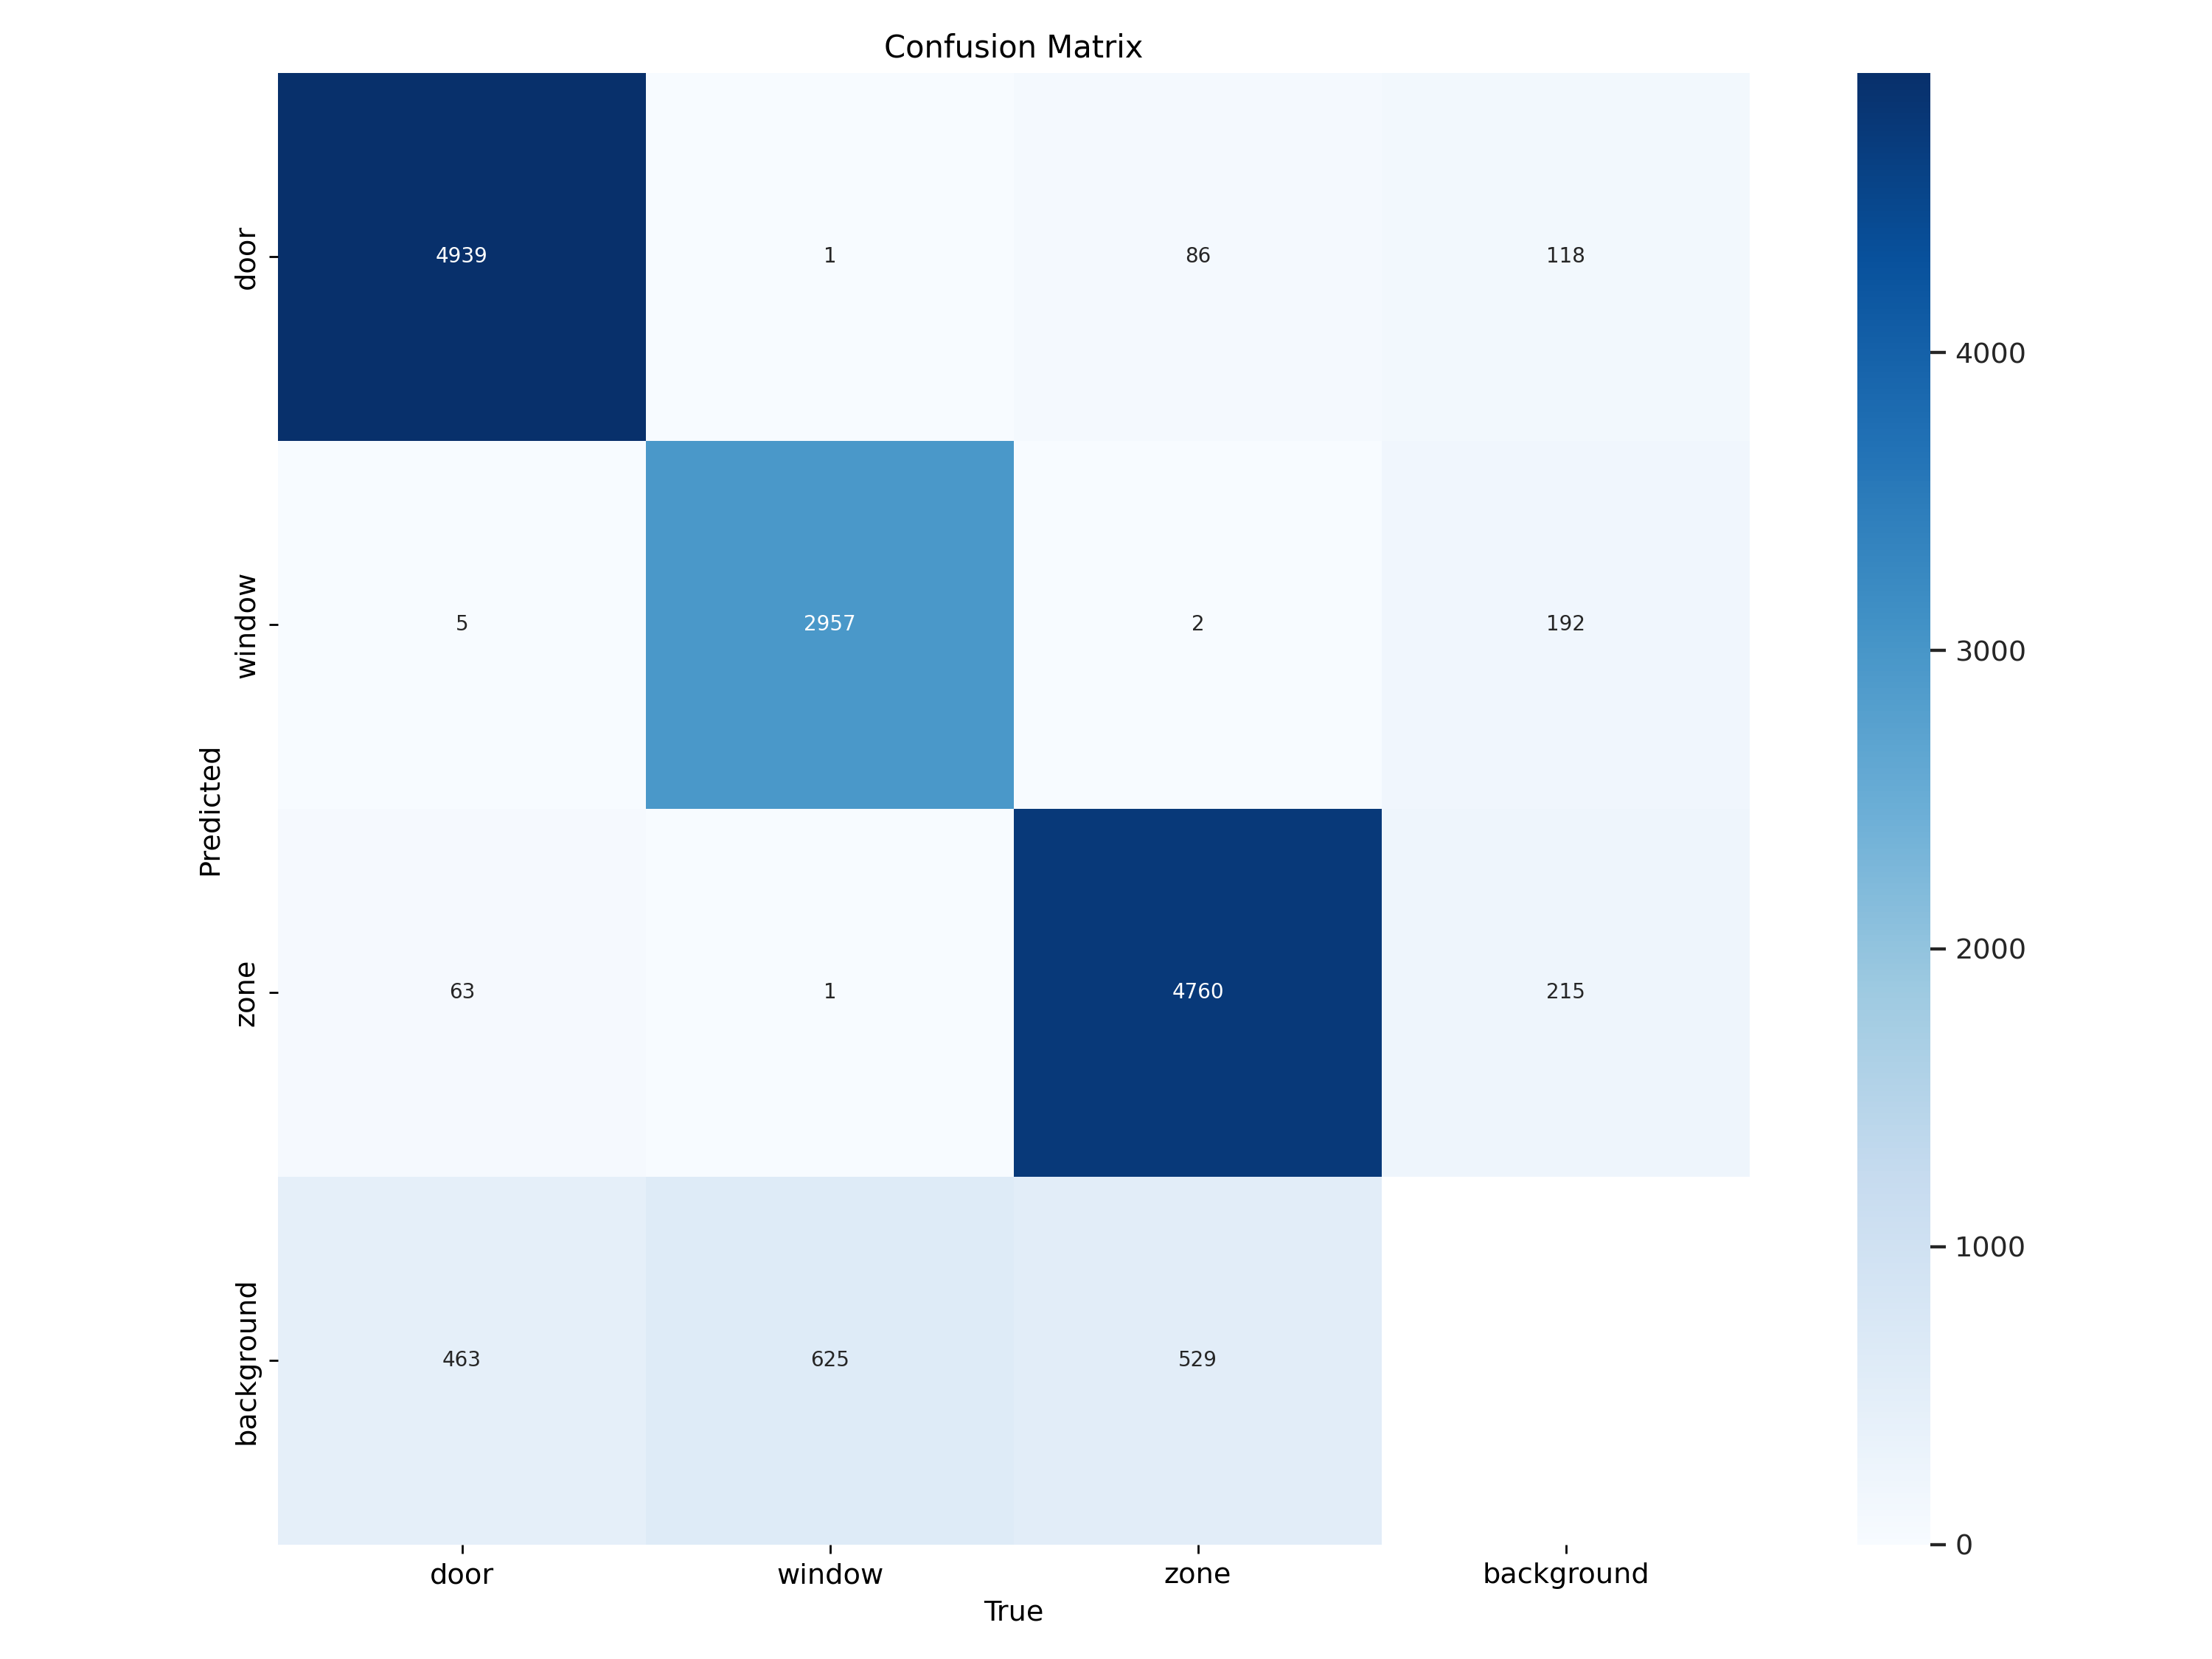

In [6]:
Image (filename=f'/notebooks/runs/detect/train16/confusion_matrix.png', width=600)

In [7]:
!yolo task=detect mode=predict model="/notebooks/runs/detect/train16/weights/best.pt" conf=0.5 source="data/test/images"

Ultralytics YOLOv8.1.24 🚀 Python-3.9.16 torch-1.12.1+cu116 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/255 /notebooks/data/test/images/1010_png.rf.cf3c8ce678e7dc00f7d5f0921f439858.jpg: 640x640 2 doors, 1 window, 3 zones, 6.5ms
image 2/255 /notebooks/data/test/images/1012_png.rf.fd3d80c9e721a4e8b0c369a9be397af6.jpg: 640x640 2 doors, 1 window, 1 zone, 8.4ms
image 3/255 /notebooks/data/test/images/1014_png.rf.6b088752e5649eeeb7334ff08996d2a2.jpg: 640x640 7 doors, 5 windows, 6 zones, 7.4ms
image 4/255 /notebooks/data/test/images/1143_png.rf.544ecf6ffbb324793578c26f04af7760.jpg: 640x640 7 doors, 4 windows, 6 zones, 7.0ms
image 5/255 /notebooks/data/test/images/1156_png.rf.d6b44f9ce1e99ca6a440a33c88714242.jpg: 640x640 7 doors, 4 windows, 5 zones, 7.1ms
image 6/255 /notebooks/data/test/images/1165_png.rf.100d7ec198af12c832d20e45bf013990.jpg: 640x640 6 doors, 3 windows, 4 zones, 6.4ms
image 7/255 /notebooks/data/